In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
from time import strftime

In [18]:
df = pd.read_csv("C:/Users/vanim/Downloads/Data.csv")

 
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [21]:
df.shape

(110527, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [25]:
#modifying the date and time into standard form
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [26]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
61130,9.284495e+12,5545561,F,2016-04-05,2016-05-16,24,SANTA MARTHA,0,0,0,0,0,0,No
17419,3.664196e+13,5666732,M,2016-05-06,2016-05-09,8,SÃO JOSÉ,0,0,0,0,0,0,No
11016,3.449227e+13,5720539,M,2016-05-19,2016-05-24,42,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
97221,5.594621e+14,5583288,M,2016-04-14,2016-06-06,22,JUCUTUQUARA,0,0,0,0,0,1,Yes
49802,2.515392e+13,5592005,F,2016-04-18,2016-05-11,4,JARDIM DA PENHA,0,0,0,0,0,1,No


In [27]:
# 5 is Saturday, 6 is Sunday 

df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek

In [28]:
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [29]:
df['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [30]:
df['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [31]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [32]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [33]:

#changing the name of some cloumns
data= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [34]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [77]:
data.isnull().sum()

Gender               0
ScheduledDay         0
AppointmentDay       0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMSReceived          0
NoShow               0
sch_weekday          0
app_weekday          0
Age_group         3540
dtype: int64

In [39]:
# dropping some columns which have no significance
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [79]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,41 - 61


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [43]:
data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


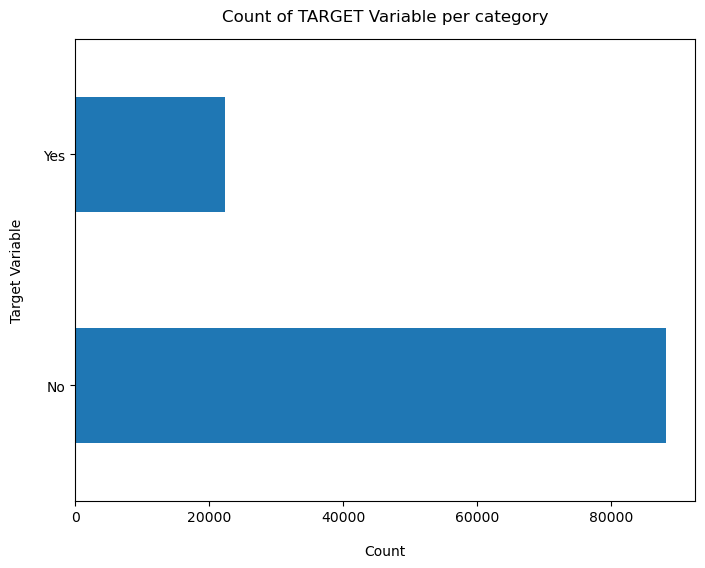

In [44]:
data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [48]:
# calculating the % of appointments or not 
100*data['NoShow'].value_counts()/len(data['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [49]:
data['NoShow'].value_counts()

NoShow
No     88208
Yes    22319
Name: count, dtype: int64

In [55]:
new_data = data.copy()

In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [57]:
print(data['Age'].max())

115


In [58]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

data['Age_group'] = pd.cut(data.Age, range(1, 130, 20), right=False, labels=labels)

In [59]:
data.drop(['Age'], axis=1, inplace=True)


In [60]:
list(data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

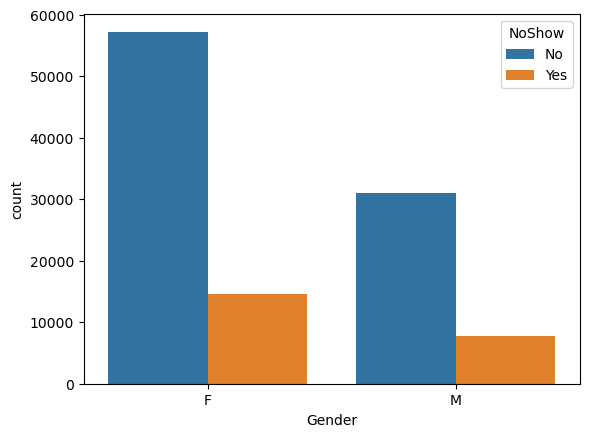

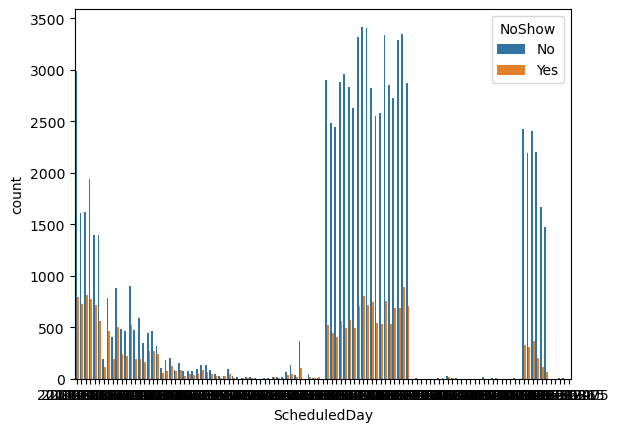

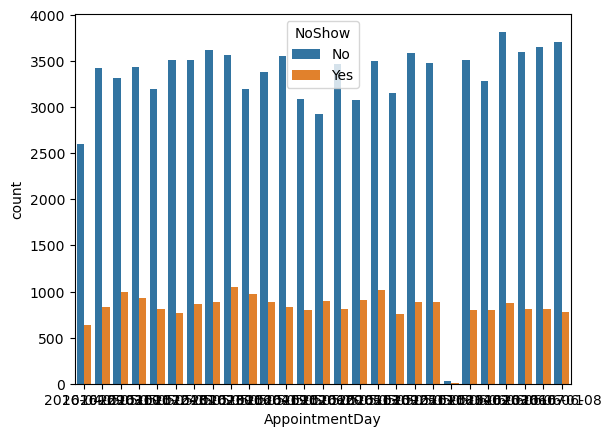

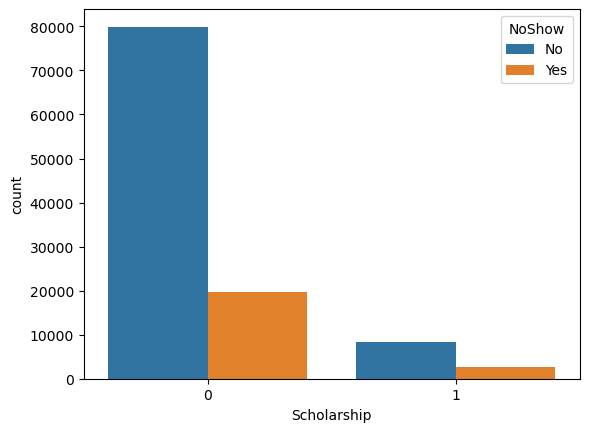

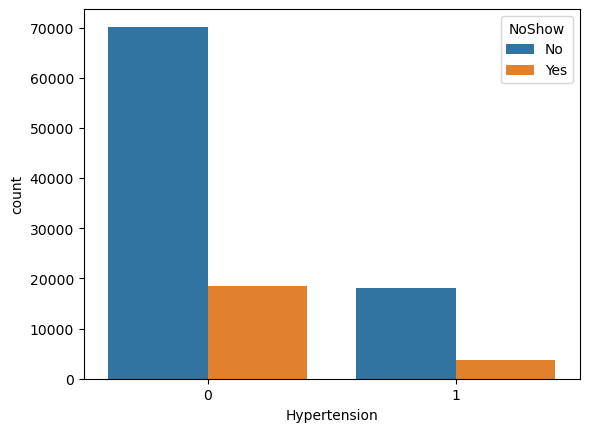

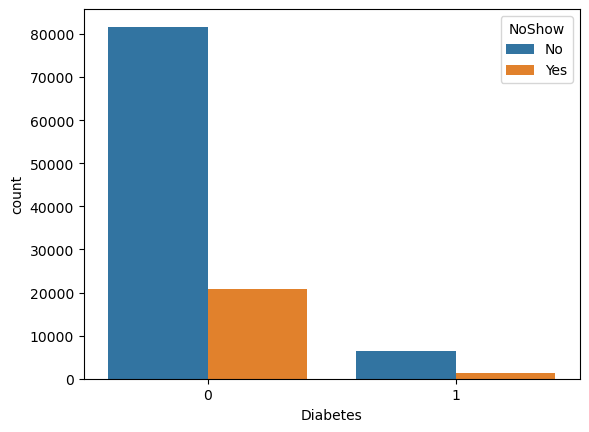

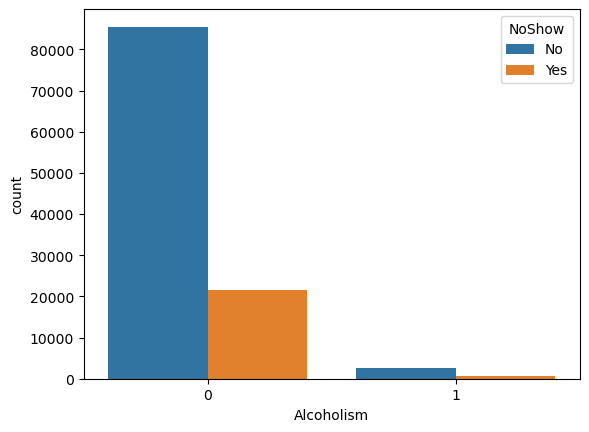

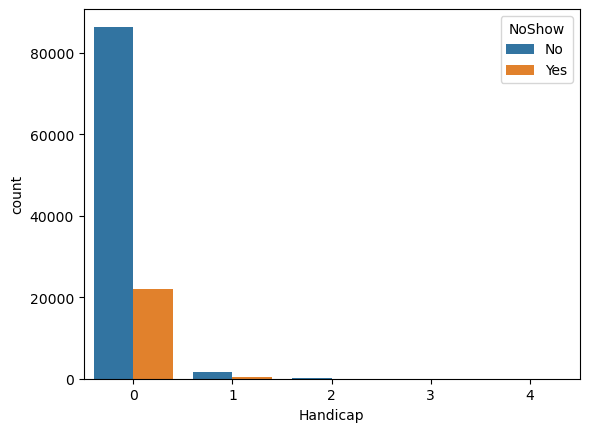

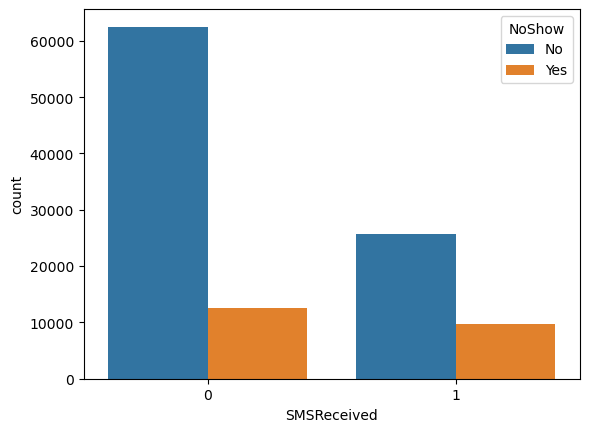

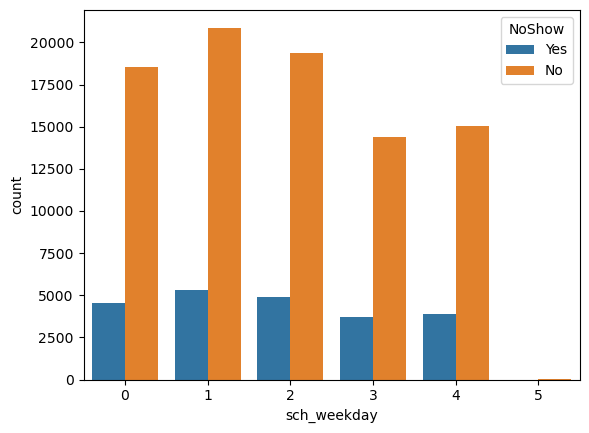

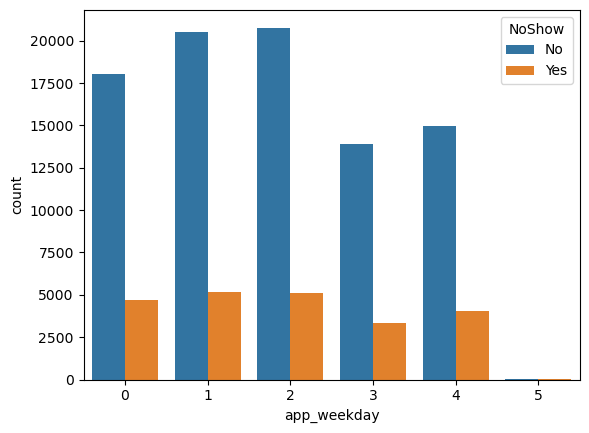

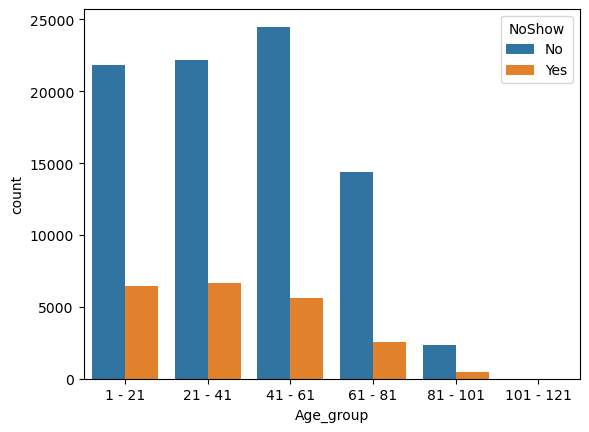

In [61]:

#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='NoShow')

In [62]:
data['NoShow'] = np.where(data.NoShow == 'Yes',1,0)

In [63]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


<Axes: >

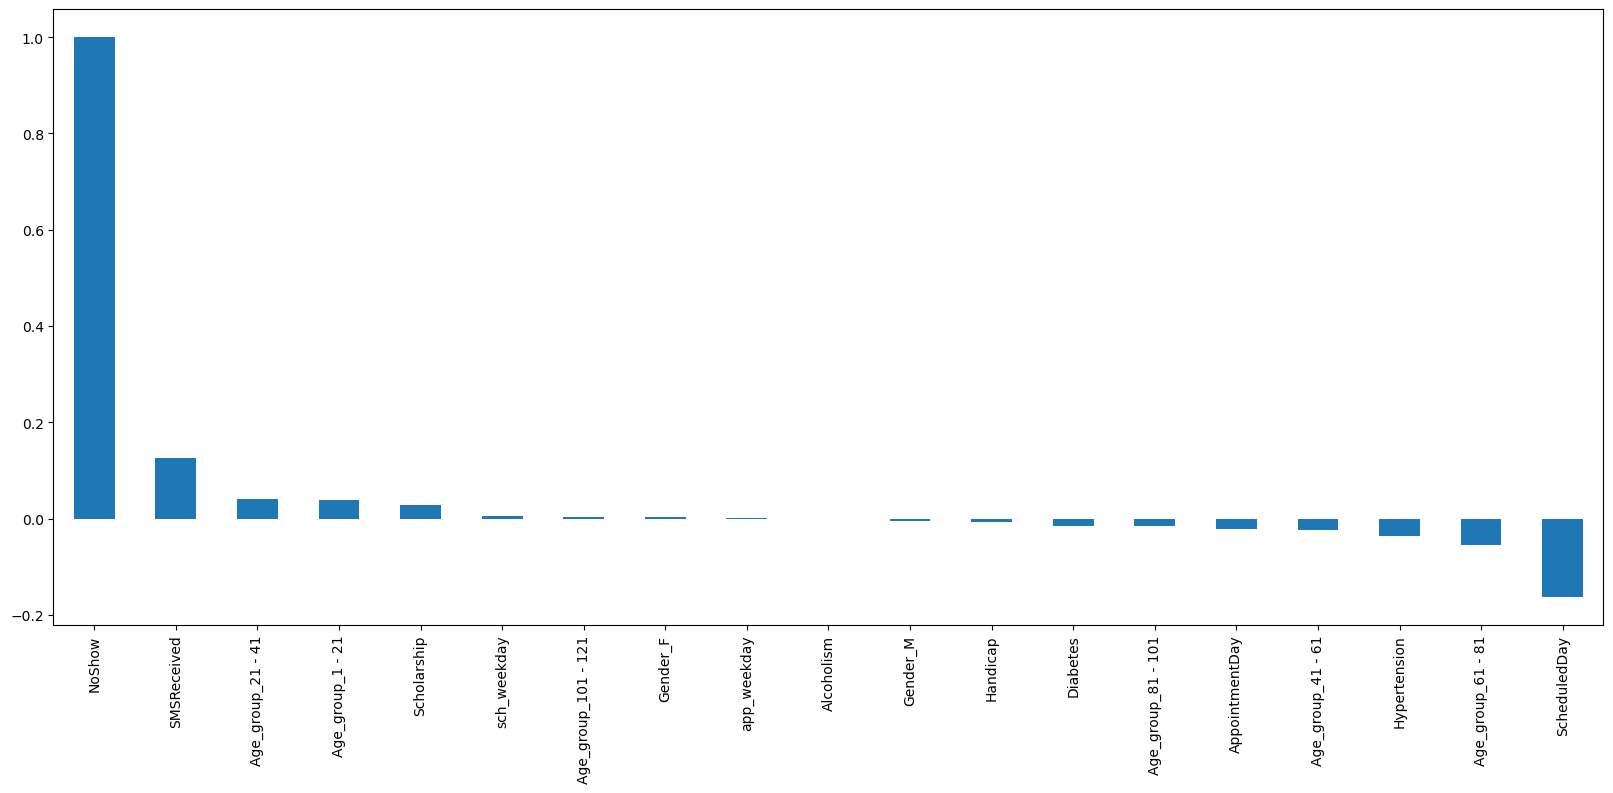

In [64]:
plt.figure(figsize=(20,8))
data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

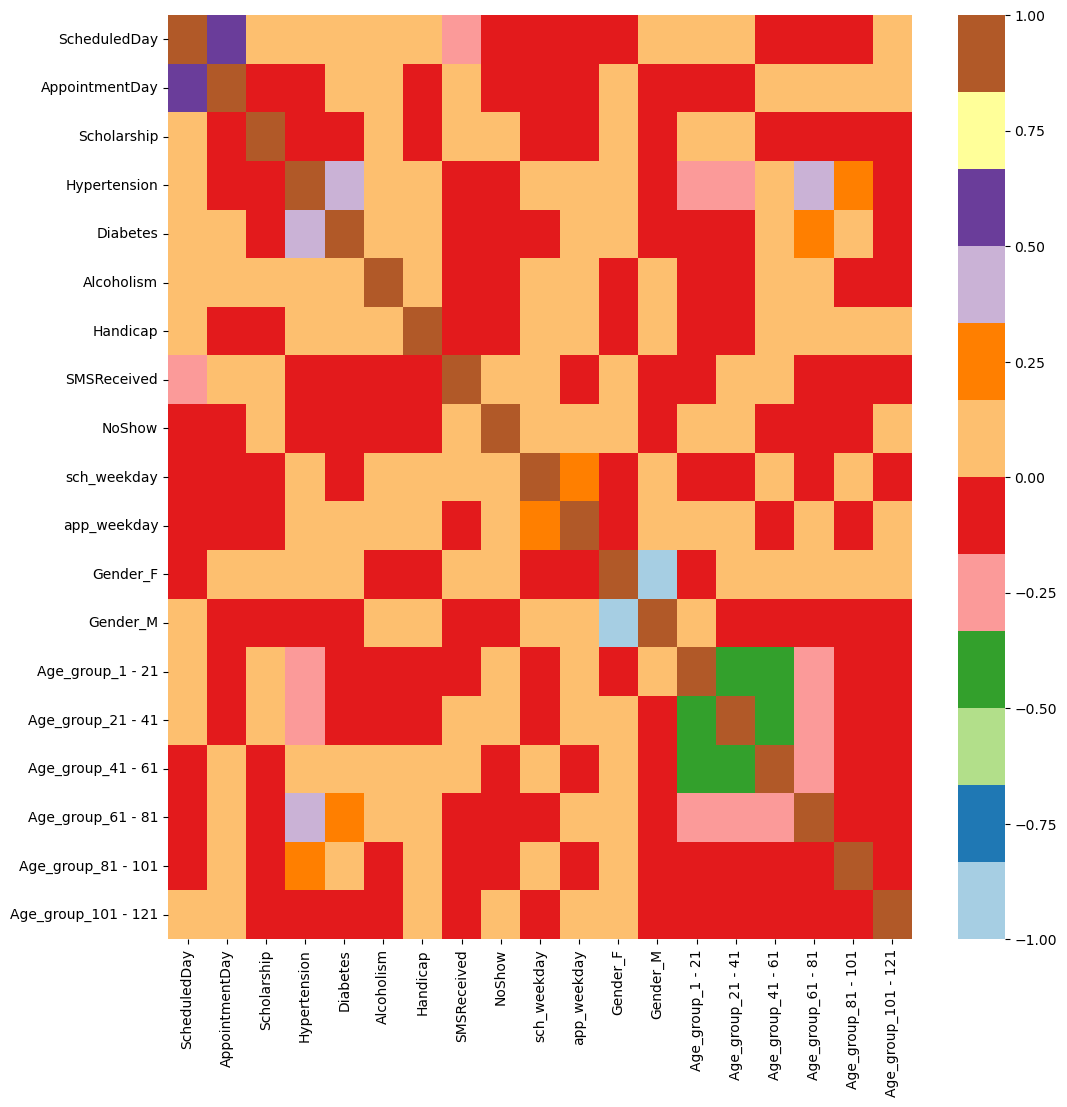

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

In [66]:
new_df1_target0=data.loc[data["NoShow"]==0]
new_df1_target1=data.loc[data["NoShow"]==1]

In [67]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

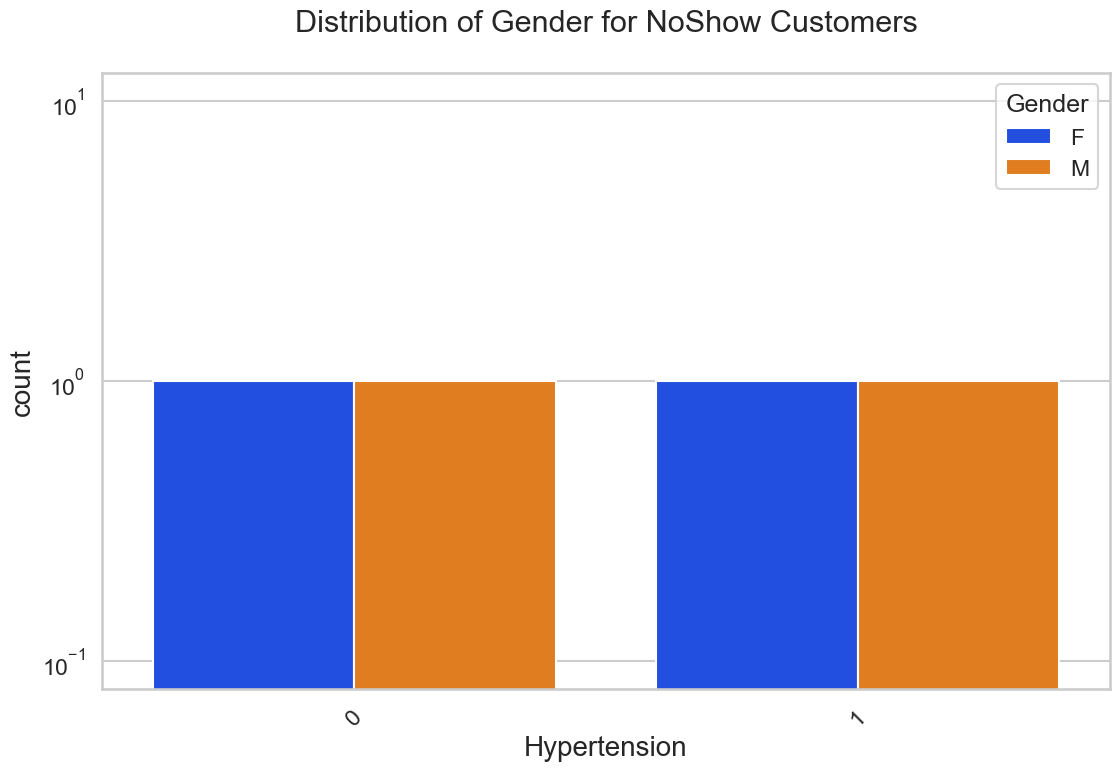

In [71]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

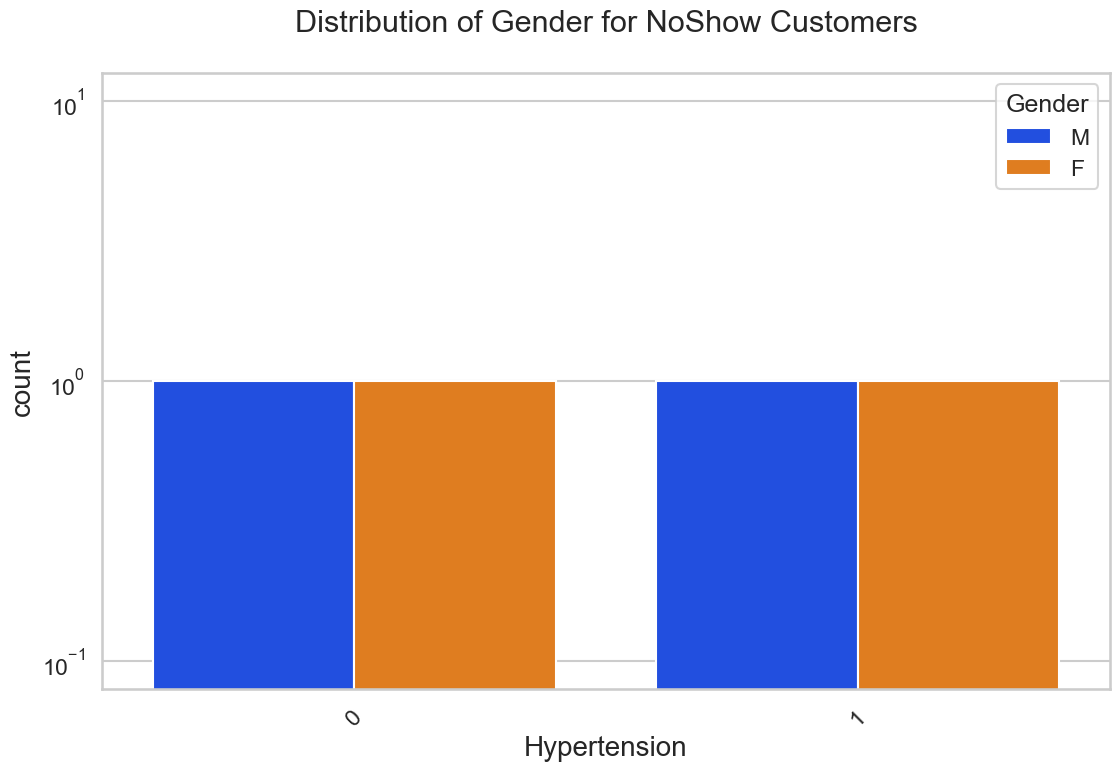

In [72]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

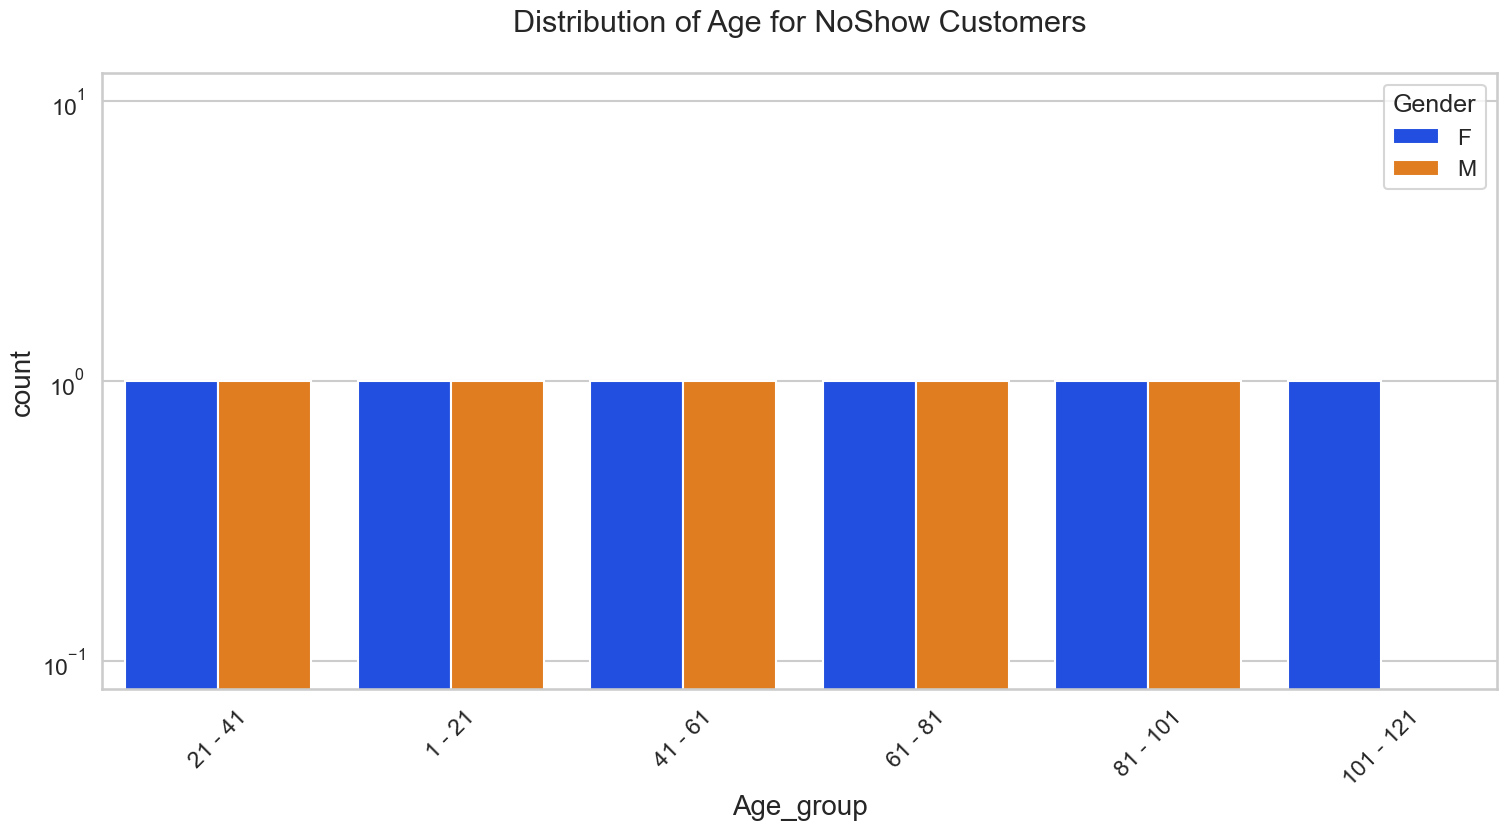

In [73]:

uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

In [74]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,41 - 61


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Scholarship     110527 non-null  int64         
 4   Hypertension    110527 non-null  int64         
 5   Diabetes        110527 non-null  int64         
 6   Alcoholism      110527 non-null  int64         
 7   Handicap        110527 non-null  int64         
 8   SMSReceived     110527 non-null  int64         
 9   NoShow          110527 non-null  int32         
 10  sch_weekday     110527 non-null  int32         
 11  app_weekday     110527 non-null  int32         
 12  Age_group       106987 non-null  category      
dtypes: category(1), datetime64[ns](2), int32(3), int64(6), object(1)
memory usage: 9.0+ MB


In [83]:
# Convert the categorical 'age_group' into an ordinal encoded column
data['age_group_encoded'] = data['Age_group'].cat.codes

In [86]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group,age_group_encoded
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81,3
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61,2
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,61 - 81,3
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1 - 21,0
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,41 - 61,2


In [87]:
# Extracting features from 'ScheduledDay'
data['ScheduledYear'] = data['ScheduledDay'].dt.year
data['ScheduledMonth'] = data['ScheduledDay'].dt.month
data['ScheduledDayOfMonth'] = data['ScheduledDay'].dt.day
data['ScheduledDayOfWeek'] = data['ScheduledDay'].dt.dayofweek
data['ScheduledHour'] = data['ScheduledDay'].dt.hour

In [88]:
# Extracting features from 'AppointmentDay'
data['AppointmentYear'] = data['AppointmentDay'].dt.year
data['AppointmentMonth'] = data['AppointmentDay'].dt.month
data['AppointmentDayOfMonth'] = data['AppointmentDay'].dt.day
data['AppointmentDayOfWeek'] = data['AppointmentDay'].dt.dayofweek
data['AppointmentHour'] = data['AppointmentDay'].dt.hour

In [93]:
data.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,...,ScheduledDayOfMonth,ScheduledDayOfWeek,ScheduledHour,AppointmentYear,AppointmentMonth,AppointmentDayOfMonth,AppointmentDayOfWeek,AppointmentHour,Gender_F,Gender_M
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,...,29,4,0,2016,4,29,4,0,True,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,...,29,4,0,2016,4,29,4,0,False,True
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,...,29,4,0,2016,4,29,4,0,True,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,...,29,4,0,2016,4,29,4,0,True,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,...,29,4,0,2016,4,29,4,0,True,False


In [94]:
# To drop multiple columns
data = data.drop(['ScheduledDay','AppointmentDay','Gender_F','Gender_F','Age_group'], axis=1)


In [95]:
data.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,age_group_encoded,...,ScheduledMonth,ScheduledDayOfMonth,ScheduledDayOfWeek,ScheduledHour,AppointmentYear,AppointmentMonth,AppointmentDayOfMonth,AppointmentDayOfWeek,AppointmentHour,Gender_M
0,0,1,0,0,0,0,0,4,4,3,...,4,29,4,0,2016,4,29,4,0,False
1,0,0,0,0,0,0,0,4,4,2,...,4,29,4,0,2016,4,29,4,0,True
2,0,0,0,0,0,0,0,4,4,3,...,4,29,4,0,2016,4,29,4,0,False
3,0,0,0,0,0,0,0,4,4,0,...,4,29,4,0,2016,4,29,4,0,False
4,0,1,1,0,0,0,0,4,4,2,...,4,29,4,0,2016,4,29,4,0,False


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X=data.drop('NoShow',axis=1)
Y=data['NoShow']

In [98]:
X.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday,age_group_encoded,ScheduledYear,ScheduledMonth,ScheduledDayOfMonth,ScheduledDayOfWeek,ScheduledHour,AppointmentYear,AppointmentMonth,AppointmentDayOfMonth,AppointmentDayOfWeek,AppointmentHour,Gender_M
0,0,1,0,0,0,0,4,4,3,2016,4,29,4,0,2016,4,29,4,0,False
1,0,0,0,0,0,0,4,4,2,2016,4,29,4,0,2016,4,29,4,0,True
2,0,0,0,0,0,0,4,4,3,2016,4,29,4,0,2016,4,29,4,0,False
3,0,0,0,0,0,0,4,4,0,2016,4,29,4,0,2016,4,29,4,0,False
4,0,1,1,0,0,0,4,4,2,2016,4,29,4,0,2016,4,29,4,0,False


In [101]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: NoShow, dtype: int32

In [100]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [103]:

from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler=MinMaxScaler()

In [107]:
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [108]:
x_train_scaler

array([[0. , 1. , 0. , ..., 0.4, 0. , 0. ],
       [0. , 1. , 1. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0.4, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0.6, 0. , 0. ]])

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [110]:

# Initialize and fit the Logistic Regression model using OvR (default)
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
model.fit(x_train_scaler, y_train)

# Make predictions
y_pred = model.predict(x_test_scaler)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Results:
Accuracy: 0.7941735275490817
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     26411
           1       0.35      0.01      0.02      6748

    accuracy                           0.79     33159
   macro avg       0.57      0.50      0.45     33159
weighted avg       0.71      0.79      0.71     33159



In [111]:
# Initialize and fit the Logistic Regression model using multinomial approach
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train_scaler, y_train)

# Make predictions
y_pred = model.predict(x_test_scaler)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Results:
Accuracy: 0.7941735275490817
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     26411
           1       0.35      0.01      0.02      6748

    accuracy                           0.79     33159
   macro avg       0.57      0.50      0.45     33159
weighted avg       0.71      0.79      0.71     33159



In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
# Initialize PolynomialFeatures to generate polynomial features
poly = PolynomialFeatures(degree=3)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(x_train_scaler)
X_test_poly = poly.transform(x_test_scaler)

In [114]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Results:
Accuracy: 0.7940227389245755
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     26411
           1       0.44      0.04      0.08      6748

    accuracy                           0.79     33159
   macro avg       0.62      0.51      0.48     33159
weighted avg       0.73      0.79      0.72     33159



In [115]:
y_pred = model.predict(X_test_poly)

In [117]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [118]:
print(comparison_df)

        Actual  Predicted
107871       0          0
12336        0          0
43660        0          0
52712        0          0
30303        0          0
...        ...        ...
12481        0          0
61209        0          0
109435       0          0
2774         1          0
68886        0          0

[33159 rows x 2 columns]


In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)


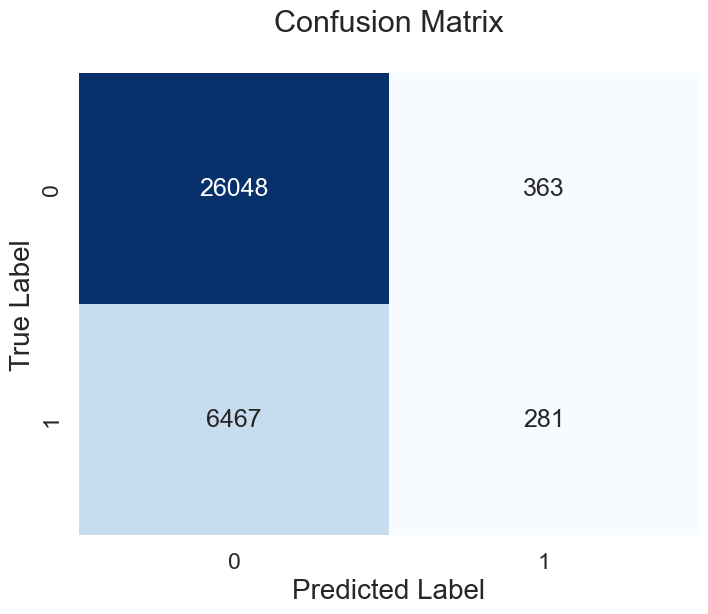

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()